# EDA

# Problem Statement

BreathEasy is a CPAP reseller and would like to advertise to two groups.
1. Group 1 are people who use CPAP machines
2. Group 2 are people who do not use CPAP machines but are concerned about sleep disorders like sleep apnea and snoring

Each group will have a different advertisement presented to them.

They want to have a model to predict which advertisement to show them based on their posts on reddit or other forms of social media.

# Introduction

According to Markets N Research, the market for CPAP machines (and its accessories) will increase from USD 5.2 billion in 2022 to an estimate of USD 7.8 billion in 2030. Outside the emergency use cases for COVID-19 and other respiratory diseases, the main consumer use is for sleep apnea and snorning.

Using text data from the Subreddits, CPAP and Sleep, this project will aim to generate a model that will classify a social media post such that the consumer can be advertised to appropriately.

For existing CPAP machine users, the ad will mainly focus on the new wellness app that BreathEasy has collaborated with other health tracking devices.

For potential CPAP machine users, the ad will focus on the benefits of using a CPAP machine and a special trail offer.

$^1$ https://finance.yahoo.com/news/global-continuous-positive-airway-pressure-153000669.html

# Importing libraries and data and further cleaning.

In [69]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
pd.options.display.max_colwidth = 400

In [104]:
df = pd.read_pickle("datasets/df.pkl")

# EDA: Reading random posts to explore data

In [22]:
random.seed(42)
for i in range(5):
    print(f"\n{random.choice(df[df['subreddit']=='CPAP']['text'])}")


Received the Phillips Auto CPAP today after 18 months of waiting and calling in to request option 2 two weeks ago, they sent a machine with 6000+ hours and reset the blower hours, it also has the new white foam of the DS2... 

Humidifiers are such a freakin game changer! So I’ve been using CPAPs for a little over a year and still getting used to things. For the better part of this time I had not been using a humidifier because I found the extra maintenance to be a bit of a chore, and using it with without the humidifier worked well enough… or so I thought.Last week a caught a head cold and felt distinctly remember feeling my sinuses feeling very cold and dry throughout. The night before last night was especially uncomfortable and it took me forever to fall asleep.Last night while watching TV I got a pretty heavy nosebleed, which just doesn’t happen for me. I’m 35, and the only other time I remember having that much blood coming from my nose was a time I got hit in the face during a fr

From the small sample above, we can see that words that are common are
Phillips, CPAP, mask, airsense

Also note that Resmed and Phillips are brands of CPAP machines and Oscar is an open source computer programme used for analysing CPAP data.

In [27]:
random.seed(42)
for i in range(5):
    print(f"\n{random.choice(df[df['subreddit']=='sleep']['text'].reset_index(drop=True))}")


What medication have you started using to make you fall asleep faster? Melatonin is not working for me.

How can I learn to thrive with poor quality sleep? Due to my toddler’s poor sleep, I get around 4-5 hours of broken sleep (broken into 3 sessions, with gaps of an hour or two) a night. I never sleep more than two consecutive hours. Before I had my child, I slept 8-9 hours a night. I have a demanding job and am really struggling to be at my best due to my lack of sleep. I’m also more prone to illness and stress. I’ve done everything I can to try to get my kid to sleep more, but have consistently failed.I’m looking for suggestions about how to cope with this and manage to live with very poor quality sleep. I try to exercise and eat well, but I’m still really struggling.Thanks!

Recommendations for a stressful household? Hello. I am 19 and I live in a stressful house. It makes it near impossible to sleep. I usually am too anxious to sleep properly and I dunno what to do about it. I ha

From this small sample, we can see that there are people are sharing about medications and reasons for sleep trouble.

# EDA: Length of posts by words

In [29]:
df['post_word_count'] = df['text'].map(lambda x:len(x.split()))

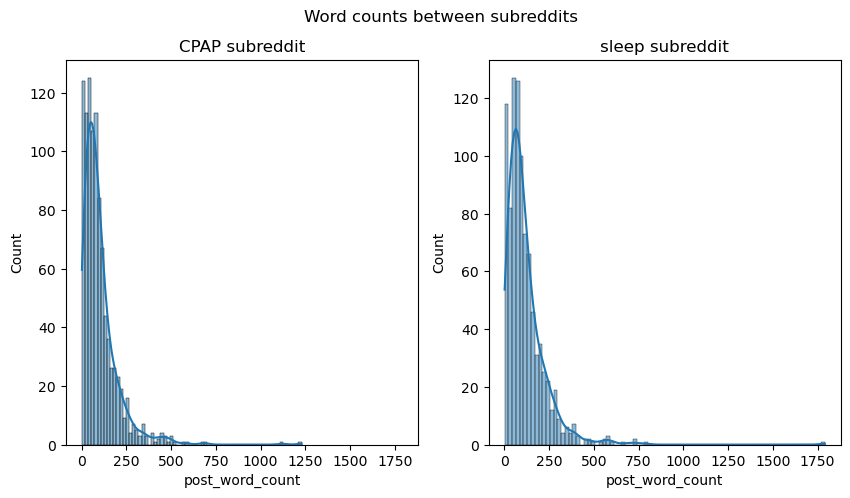

In [30]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols=2, figsize=(10,5), sharex=True, dpi=100)

sns.histplot(ax=ax1,data=df[df['subreddit']=='CPAP']['post_word_count'],kde=True)
sns.histplot(ax=ax2, data=df[df['subreddit']=='sleep']['post_word_count'],kde=True)

fig.suptitle('Word counts between subreddits')
ax1.set_title('CPAP subreddit')
ax2.set_title('sleep subreddit')

plt.show()

CPAP users seem to have shorter posts. Let's check out the longest posts.

In [34]:
df.sort_values(by='post_word_count', ascending=False)

,subreddit,text,post_word_count
1318,sleep,My Sleep Protocol - Wish I Knew How to Sleep E...,1791
127,CPAP,"New CPAP user looking for advice Hi, I have mi...",1229
970,CPAP,Breath meditation and visualization helped me ...,1120
1826,sleep,Cant wake up like a normal person My marriage ...,783
1706,sleep,Feeling fatigued and drained? Focus on your sl...,729
...,...,...,...
272,CPAP,OSCAR Troubleshoot,2
487,CPAP,camping,1
824,CPAP,Cpa,1
1733,sleep,sleeping,1


In [35]:
df.loc[1318]['text']

'My Sleep Protocol - Wish I Knew How to Sleep Earlier! * **Natural Daily and Nightly Rhythm**   * Be in bed long enough to ensure 7.5 or more hours, meaning in bed, phone off, closing eyes at 10pm, and alarm going off at 5:30AM. Aim for 8.5 hours or more for teens.   * Sleep and wake at same time each day, including weekends. If you do stay up late on a weekend, force yourself to wake at the same time in the morning, try to stay awake for at least 1 hour, eat, then take a nap of no more than 1.5 hours. Your Monday morning will thank your Saturday wake time.   * For naps, attempt to nap earlier in the day, if possible, avoid naps past 3pm.   * Finish exercise ideally 2-3 hours before sleep, like finishing a workout at 8:30, when you sleep time is 10:30. This gives the body a chance to calm down.* **Bedding (NOT TALKED ABOUT ENOUGH, BUT CRITICAL)**   * Bed must be firm and flat, not sinking in the middle (like a beanbag, an airbed, waterbed, an old mattress, or something with way too thi

This is an ad for sleep coaching.

In [36]:
df.loc[127]['text']

"New CPAP user looking for advice Hi, I have mild sleep obstructive sleep apnea and central apnea. I'm having neurological problems for almost a year as well as insomnia. Had a sleep study and decided to try CPAP.I've been using it for a week. I've seen my obstructive events go down and my central events go up slightly.I'm using the ResMed AirSense 11 Auto and P10 nasal pillows. Using medium sized mask and pillows.I'm also using a chinstrap to prevent my mouth from opening.Of course, it's all very uncomfortable to me as a new user. I was expecting that.I don't mind the feeling of the positive air pressure as it does make breathing a little easier in more positions. It varies between 5-7 pressure.The 2 biggest issues for me so far are the hose and all the stuff on my head/face.1- The hose seems to be a standard high quality hose but it's so firm and heavy. It will kink on itself, makes lots of noise rubbing on stuff. I'm always wrestling with it in my sleep. I've tried running it behind

This is a potential user of BreathEasy. They are looking for accessories for CPAP machines.

In [38]:
df.loc[970]['text']

'Breath meditation and visualization helped me get used to the mask. I wanted to share these techniques that helped me get good sleep with the cpap machine.  Sleeping well with the Cpap has hugely improved my daily life, and it was really hard for me to get used to the mask before I used these techniques. I know people out there struggle with the mask and I hate to think that there are all these people feeling strangled in their sleep because as soon as they drift off they instinctively rip the mask off because it’s uncomfortable.  Sleep apnea is a damned plague on the human race, I wouldn’t wish it on anyone.I should note that I’m not sure how to decide what cpap pressure setting is right for you.  I fiddled around with the machine until I felt I was getting firm backpressure and wasn’t waking up gassy.  But getting the pressure that’s best for you is very important.  Maybe seek out information elsewhere about how to do that. ON TO THE EXERCISES:I only have two good exercises, but the

Good tips for BreathEasy to use in their promotional material.

In [39]:
df.loc[1826]['text']

"Cant wake up like a normal person My marriage is solid, but there of course are pain points... like all relationships.  One that I really want to work on is my sleeping issues.  I have always struggled with sleep.  I struggle to fall asleep, struggle to stay asleep and once I am finally asleep... I struggle to wake up.  I am working with my doctor and have been on trazadone for several months.. its awesome, its made a big difference.  But I still struggle to wake up.  I have several alarms set at 15 min intervals.  I work from home and have to be logged in at 5:30 am, so I try to get up at 4:30...  My husband hates the alarms.  Before he was disabled he worked out of town 10-14 days at a time with 4 days home.. so its never really been that huge of a deal.. but now he is home all the time, and has to deal with my barrage of alarms.  His solution... Just get up with the first alarm.. don't hit snooze or ignore.   I do have it away from me so I have to get out of bed.. but I don't have 

This might be a potential client for BreathEasy. The word 'struggle' stood out. It might be a word to look for in the model.

In [40]:
df.loc[1706]['text']

'Feeling fatigued and drained? Focus on your sleep habits and remember that you can still be your best! For the past 5 years, I\'ve been struggling with daily fatigue and drowsiness no matter what I change.***Stimulants, medication, diagnoses, vitamins, melatonin, sleep posture, food consumption, cognitive change, ambient temperature, white noise, stress reduction, visual stimuli, physical activity.***I have tried so much, yet I have never **"solved"** my *fatigue issue.*Doctors have told me that my vitals are all in healthy ranges, reasoning that there is nothing biologically wrong. Psychologists have told me that it could simply be depression. Yet any answer doesn\'t help, because my issue isn\'t going to be fixed.*Getting an answer for* ***what\'s wrong with me*** *has always been my priority,* rather than focusing on **improving my sleep to the most**, rather than fixing the issue!&#x200B;Most people that have fatigue won\'t ever have the issue fixed, because there are so many elem

There seems to be quite a bit of cleaning needed for this one post.

In [50]:
df.loc[1706]['text']

'Feeling fatigued and drained? Focus on your sleep habits and remember that you can still be your best! For the past 5 years, I\'ve been struggling with daily fatigue and drowsiness no matter what I change.***Stimulants, medication, diagnoses, vitamins, melatonin, sleep posture, food consumption, cognitive change, ambient temperature, white noise, stress reduction, visual stimuli, physical activity.***I have tried so much, yet I have never **"solved"** my *fatigue issue.*Doctors have told me that my vitals are all in healthy ranges, reasoning that there is nothing biologically wrong. Psychologists have told me that it could simply be depression. Yet any answer doesn\'t help, because my issue isn\'t going to be fixed.*Getting an answer for* ***what\'s wrong with me*** *has always been my priority,* rather than focusing on **improving my sleep to the most**, rather than fixing the issue!&#x200B;Most people that have fatigue won\'t ever have the issue fixed, because there are so many elem

The asterisks are used bold words in Reddit. 

# EDA: Word counts

We will vectorize the words for each subrredit, removing stop words.

In [93]:
cv_cpap = CountVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(['just','like','ve','got']), min_df=1)

cv_cpap.fit(df[df['subreddit']=='CPAP']['text'])

text_cv_cpap = cv_cpap.transform(df[df['subreddit']=='CPAP']['text'])
text_df_cpap = pd.DataFrame(text_cv_cpap.todense(),
                           columns = cv_cpap.get_feature_names_out())

In [82]:
text_df_cpap.sum().sort_values(ascending=False).head(15)

mask        878
cpap        856
sleep       656
machine     544
night       476
using       342
use         294
resmed      286
new         257
pressure    253
10          238
air         238
nasal       223
airsense    218
nose        217
dtype: int64

Masks and CPAP seem to be a good indicator of CPAP users as expected.

In [98]:
cv_sleep = CountVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(['ve','like','just','don','https']), min_df=1)

cv_sleep.fit(df[df['subreddit']=='sleep']['text'])

text_cv_sleep = cv_sleep.transform(df[df['subreddit']=='sleep']['text'])
text_df_sleep = pd.DataFrame(text_cv_sleep.todense(),
                           columns = cv_sleep.get_feature_names_out())

In [99]:
text_df_sleep.sum().sort_values(ascending=False).head(15)

sleep       2574
night        671
wake         571
hours        532
time         493
asleep       458
bed          414
feel         386
day          372
sleeping     370
fall         283
know         271
tired        246
help         242
waking       228
dtype: int64

We can see that sleep stands out here as oppsed to the CPAP subreddit.

# Checking Bigrams

In [100]:
cv_cpap = CountVectorizer(ngram_range=(2,2), stop_words=text.ENGLISH_STOP_WORDS.union(['just','like','ve','got']), min_df=1)

cv_cpap.fit(df[df['subreddit']=='CPAP']['text'])

text_cv_cpap = cv_cpap.transform(df[df['subreddit']=='CPAP']['text'])
text_df_cpap = pd.DataFrame(text_cv_cpap.todense(),
                           columns = cv_cpap.get_feature_names_out())

In [101]:
text_df_cpap.sum().sort_values(ascending=False).head(15)

sleep apnea        113
airsense 11         97
cpap machine        96
airsense 10         93
using cpap          90
face mask           72
sleep study         72
resmed airsense     72
nasal mask          60
new cpap            59
fall asleep         56
nasal pillow        49
nasal pillows       39
https www           34
don know            32
dtype: int64

Sleep apnea appears to be a good bigram to check if the user is a cpap user.

In [102]:
cv_sleep = CountVectorizer(ngram_range=(2,2),stop_words=text.ENGLISH_STOP_WORDS.union(['ve','like','just','don','https']), min_df=1)

cv_sleep.fit(df[df['subreddit']=='sleep']['text'])

text_cv_sleep = cv_sleep.transform(df[df['subreddit']=='sleep']['text'])
text_df_sleep = pd.DataFrame(text_cv_sleep.todense(),
                           columns = cv_sleep.get_feature_names_out())

In [103]:
text_df_sleep.sum().sort_values(ascending=False).head(15)

fall asleep        256
hours sleep        124
sleep schedule     119
falling asleep      95
sleep hours         70
sleep night         66
deep sleep          53
sleep quality       53
sleep sleep         43
able sleep          41
night sleep         39
going bed           39
spotify com         38
sleep paralysis     38
open spotify        38
dtype: int64

We can see that 'fall asleep' appears both in r/sleep and r/CPAP.

Otherwise, using bigrams would also be a good differentiator.

We will move on to then next notebook for pre-processing and modelling